# On essaie d'ouvrir les CSV fournis par Eric

Consigne : 

> trouver la variable "CYCLE" et définir la donnée correspondante à la date du 13/10/2014 13:09 par exemple

# En python pur

In [165]:
import csv 
from dateutil.parser import parse
import datetime

fname = "./jour3/RechercheCSV.csv"


def remove_duplicate(input):
    return list(set(input))


def transpose(values: dict) -> list:
    res = []
    transposed = list(zip(*values.values(), strict=True))
    for item in transposed:
        res.append(dict(zip(values.keys(), item, strict=True)))
    return res

def convert_types(values):
    """
    """
    for value in values:
        value["DATE"] = parse(value["DATE"])
        value["ACQUISITION-STARTDATE"] = parse(value["ACQUISITION-STARTDATE"])
        value["ACQUISITION-ENDDATE"] = parse(value["ACQUISITION-ENDDATE"])
    return values

def ouverture_avec_csv(fname):
    res = {}
    with open(fname) as f_csv:
        csv_handler = csv.reader(f_csv, delimiter=";")
        for line in csv_handler:
            if "[ANALYSES]" in line:
                continue
            if not line:
                continue
            header, *values = line
            res[header] = values
            
    return res

def traitement(res_converted):
    res = []
    for element in res_converted:
        if datetime.datetime(2015, 5, 1) < element["DATE"] < datetime.datetime(2017, 5, 10):
            res.append(element["CYCLE"])
    
    return remove_duplicate(res)

class CSV:
    def __init__(self, fname):
        self.fname = fname
        self.data = convert_types(transpose(ouverture_avec_csv(fname)))

    def get_values_between_dates(self, start, end):
        res = []
        for element in self.data:
            if start < element["DATE"] < end:
                res.append(element["CYCLE"])
        return remove_duplicate(res)

In [166]:
# sans OOP
res = ouverture_avec_csv(fname)
res_transpose = transpose(res)
res_converted = convert_types(res_transpose)
print(traitement(res_converted))

['TRI134', 'TRI133', 'TRI135']


In [167]:
# avec OOP
c = CSV(fname)
c.get_values_between_dates(datetime.datetime(2015, 5, 1), datetime.datetime(2017, 5, 10))

['TRI134', 'TRI133', 'TRI135']

## Annexe : transposées de matrice 

In [151]:
a = [
    [1, 2, 3, 4],
    [1, 2, 3, 4],
    [1, 2, 3, 4],
    [1, 2, 3, 4],
]

print(a[3][0], a[0][3])

1 4


In [152]:
b = list(zip(*a, strict=True))
print(b)
print(b[3][0], b[0][3])

[(1, 1, 1, 1), (2, 2, 2, 2), (3, 3, 3, 3), (4, 4, 4, 4)]
4 1


# Avec Pandas

In [262]:
import pandas as pd 

df = pd.read_csv(fname, skiprows=1, sep=";")
df = df.T
df.reset_index(inplace=True)
df.rename(columns=df.iloc[0], inplace=True)
df.drop(0, inplace=True)

df.DATE = pd.to_datetime(df.DATE, format="%d/%m/%y %H:%M:%S")
df["ACQUISITION-STARTDATE"] = pd.to_datetime(df["ACQUISITION-STARTDATE"], format="%d/%m/%y %H:%M:%S")
df["ACQUISITION-ENDDATE"] = pd.to_datetime(df["ACQUISITION-ENDDATE"], format="%d/%m/%y %H:%M:%S")


In [264]:
df[df.DATE.between("2014-09", "2015-11")].CYCLE.unique()

array(['TRI133', 'TRI134'], dtype=object)

In [267]:
df[df.DATE.between("2014-09", "2015-11")].CYCLE.value_counts()

CYCLE
TRI133    33
TRI134     3
Name: count, dtype: int64

<Axes: ylabel='count'>

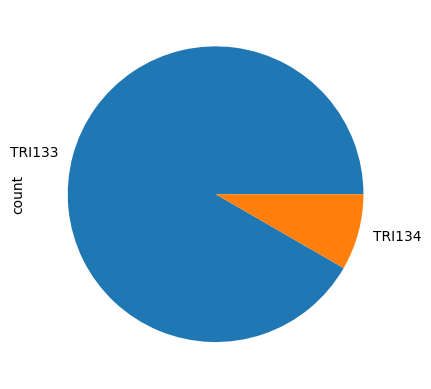

In [268]:
df[df.DATE.between("2014-09", "2015-11")].CYCLE.value_counts().plot(kind="pie")